In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
import time
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pprint
import sys
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils.class_weight import compute_sample_weight
import os






In [2]:
filepath = r'C:\Users\DEBARSHI\Documents\Programs\Python\ML-with-Spotify\tracks_features.csv'
df=pd.read_csv(filepath)


In [3]:
cols = ["artist_ids", "key","mode", "loudness", "tempo", "duration_ms","danceability", "energy", "speechiness","instrumentalness", "liveness", "valence","acousticness"]
track_genre_lyric= df[cols].copy()
track_genre_lyric.head()

,artist_ids,key,mode,loudness,tempo,duration_ms,danceability,energy,speechiness,instrumentalness,liveness,valence,acousticness
0,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,-5.399,117.906,210133,0.470,0.978,0.0727,0.000011,0.3560,0.503,0.02610
1,['2d0hyoQ5ynDBnkvAbJKORj'],11,1,-5.764,103.680,206200,0.599,0.957,0.1880,0.000071,0.1550,0.489,0.01290
2,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,-5.424,149.749,298893,0.315,0.970,0.4830,0.000002,0.1220,0.370,0.02340
3,['2d0hyoQ5ynDBnkvAbJKORj'],11,0,-5.830,96.752,213640,0.440,0.967,0.2370,0.000004,0.1210,0.574,0.16300
4,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,-6.729,127.059,205600,0.426,0.929,0.0701,0.105000,0.0789,0.539,0.00162


In [4]:
track_genre_lyric.isna().sum()

artist_ids          0
key                 0
mode                0
loudness            0
tempo               0
duration_ms         0
danceability        0
energy              0
speechiness         0
instrumentalness    0
liveness            0
valence             0
acousticness        0
dtype: int64

In [5]:
df.shape

(1204025, 24)

In [ ]:
df_numeric = df[["loudness", "danceability", "energy", "speechiness", 
                 "instrumentalness", "liveness", "valence", "acousticness","tempo"]]
scaler = StandardScaler()
df.loc[:, ["loudness", "tempo"]] = scaler.fit_transform(df[["loudness", "tempo"]])

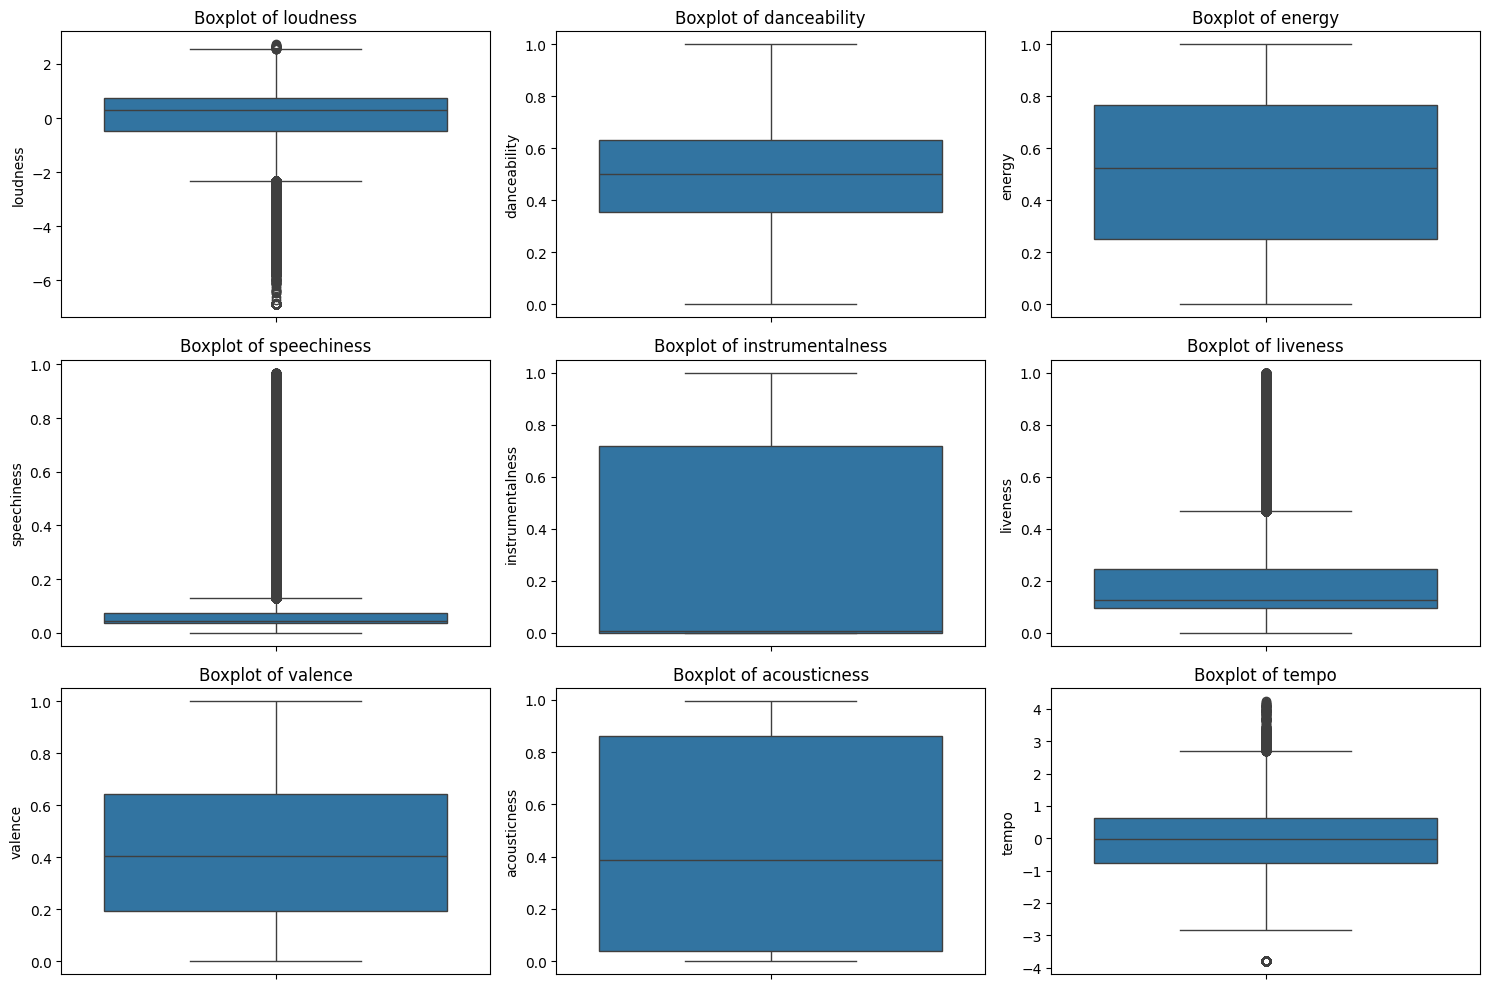

In [ ]:
df_numeric = df[["loudness", "danceability", "energy", "speechiness", 
                 "instrumentalness", "liveness", "valence", "acousticness","tempo"]]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


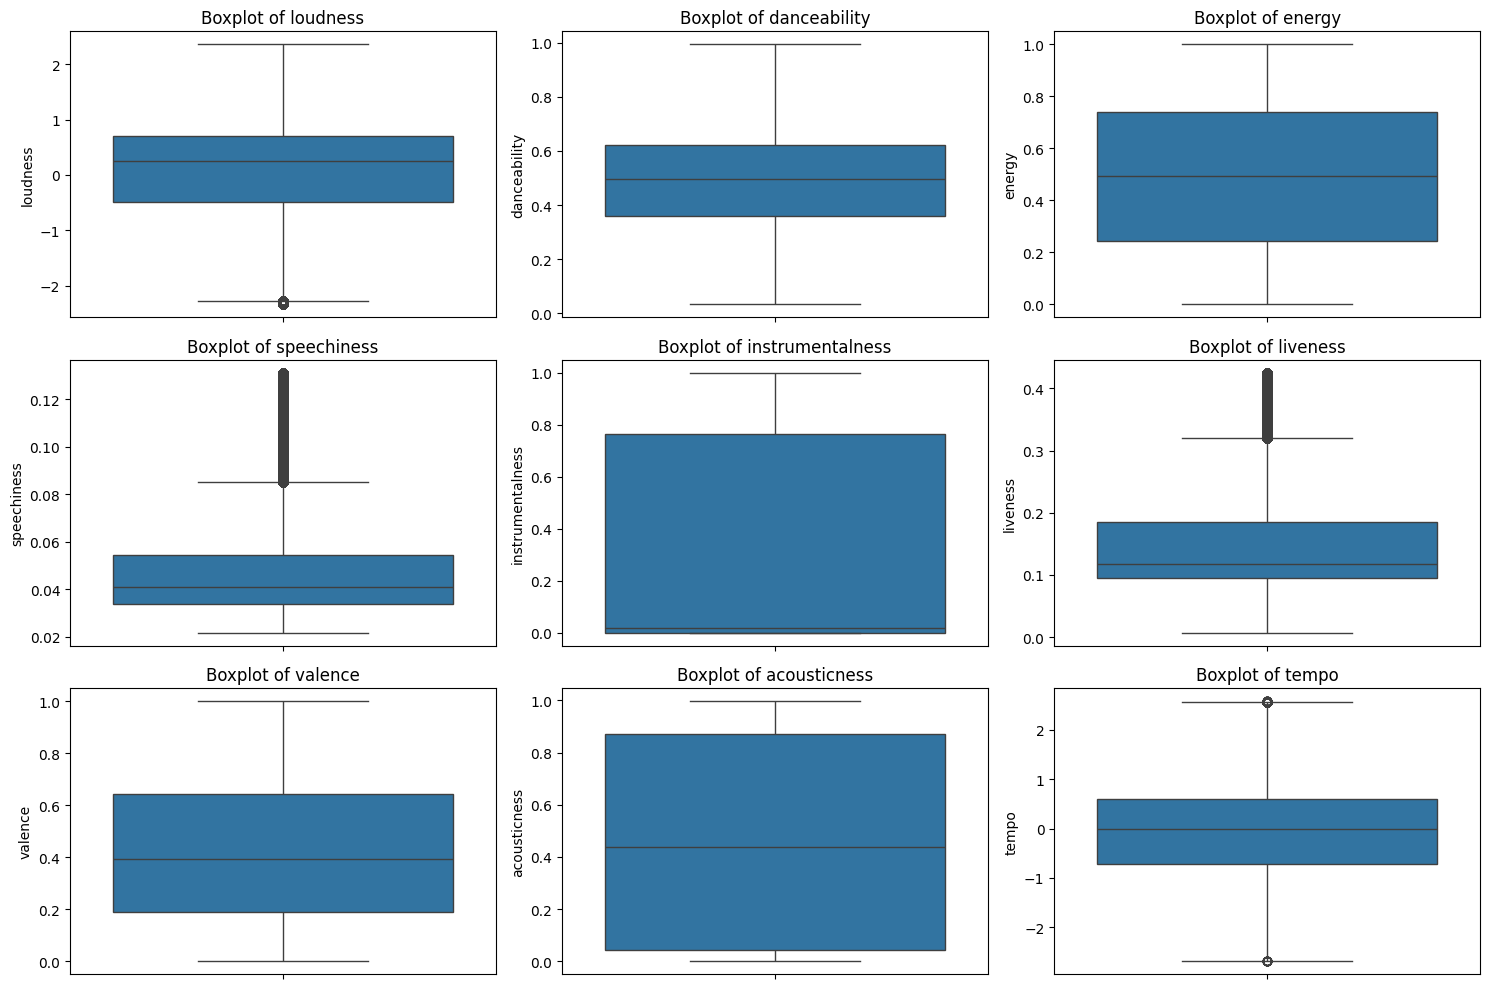

In [7]:
df_numeric = df[["loudness", "danceability", "energy", "speechiness", 
                 "instrumentalness", "liveness", "valence", "acousticness", "tempo"]].copy()

for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_numeric = df_numeric[(df_numeric[col] >= lower_bound) & (df_numeric[col] <= upper_bound)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [8]:
df_numeric.shape

(916713, 9)

In [ ]:
df = df.loc[df_numeric.index].reset_index(drop=True)
print(df.head())
print(df.shape)


                       id                    name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                 Testify  The Battle Of Los Angeles   
1  1MQTmpYOZ6fcMQc56Hdo7T   Sleep Now In the Fire  The Battle Of Los Angeles   
2  2LXPNLSMAauNJfnC58lSqY    Born of a Broken Man  The Battle Of Los Angeles   
3  4llunZfVXv3NvUzXVB3VVL                   Maria  The Battle Of Los Angeles   
4  21Mq0NzFoVRvOmLTOnJjng  Voice of the Voiceless  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJK

In [10]:
track_data= df[cols].copy()
track_data.head()

,artist_ids,key,mode,loudness,tempo,duration_ms,danceability,energy,speechiness,instrumentalness,liveness,valence,acousticness
0,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,0.918016,0.008781,210133,0.470,0.978,0.0727,0.000011,0.3560,0.503,0.02610
1,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,0.727529,0.304640,205600,0.426,0.929,0.0701,0.105000,0.0789,0.539,0.00162
2,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,0.839529,0.990646,280960,0.298,0.848,0.0727,0.001520,0.2010,0.194,0.05380
3,['2d0hyoQ5ynDBnkvAbJKORj'],11,0,0.750158,1.784710,228093,0.277,0.873,0.0883,0.000054,0.1880,0.618,0.00694
4,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,0.636726,-1.107519,151573,0.441,0.882,0.0440,0.006840,0.1500,0.418,0.01950


In [11]:
moods = {
    "happy": ["valence", "danceability", "energy"],
    "sad": ["valence", "energy"],
    "energetic": ["energy", "tempo"],
    "relaxing": ["acousticness", "tempo"],
    "dancing": ["danceability", "tempo"],
    "calm": ["loudness", "acousticness"]
}
mood_range = {
    "valence": (min(track_data["valence"]) + max(track_data["valence"])) / 2,
    "energy": (min(track_data["energy"]) + max(track_data["energy"])) / 2,
    "danceability": (min(track_data["danceability"]) + max(track_data["danceability"])) / 2,
    "tempo": (min(track_data["tempo"]) + max(track_data["tempo"])) / 2,
    "acousticness": (min(track_data["acousticness"]) + max(track_data["acousticness"])) / 2,
    "loudness": (min(track_data["loudness"]) + max(track_data["loudness"])) / 2
}
def assign_mood(row):
    for mood, conditions in moods.items():
        if all(row[condition] > mood_range[condition] for condition in conditions):
            return mood
    return 'neutral'

track_data = track_data.assign(my_mood = track_data.apply(assign_mood, axis=1))
pd.set_option("display.max_columns", None)
track_data.head()


,artist_ids,key,mode,loudness,tempo,duration_ms,danceability,energy,speechiness,instrumentalness,liveness,valence,acousticness,my_mood
0,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,0.918016,0.008781,210133,0.470,0.978,0.0727,0.000011,0.3560,0.503,0.02610,sad
1,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,0.727529,0.304640,205600,0.426,0.929,0.0701,0.105000,0.0789,0.539,0.00162,sad
2,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,0.839529,0.990646,280960,0.298,0.848,0.0727,0.001520,0.2010,0.194,0.05380,energetic
3,['2d0hyoQ5ynDBnkvAbJKORj'],11,0,0.750158,1.784710,228093,0.277,0.873,0.0883,0.000054,0.1880,0.618,0.00694,sad
4,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,0.636726,-1.107519,151573,0.441,0.882,0.0440,0.006840,0.1500,0.418,0.01950,neutral


In [12]:
mood_counts = track_data['my_mood'].value_counts()
print(mood_counts)


my_mood
neutral      315293
happy        179979
relaxing     150600
energetic    122819
sad           69555
calm          53235
dancing       25232
Name: count, dtype: int64


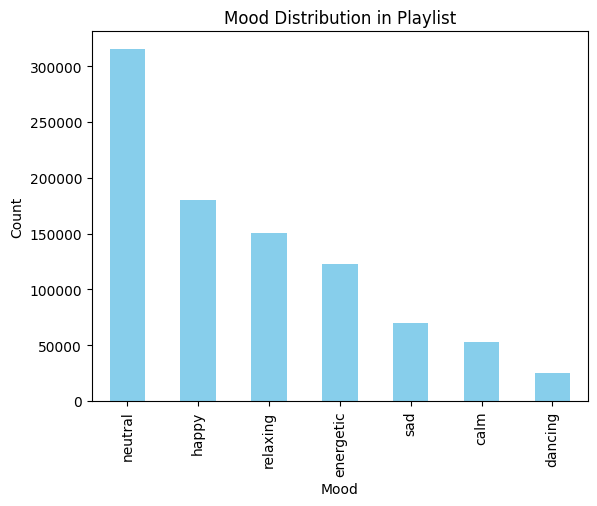

In [13]:
mood_counts.plot(kind='bar', color='skyblue')
plt.title('Mood Distribution in Playlist')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

In [14]:
y = track_data["my_mood"]
track_data.drop(columns=["my_mood", "duration_ms"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(track_data, y,stratify=y,test_size=0.2, random_state=42)


In [15]:
categorical_cols = X_train.select_dtypes(include = ["object", "float"]).columns

enc = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1)

X_train[categorical_cols] = enc.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = enc.transform(X_test[categorical_cols])

In [16]:
num_cols = X_train.select_dtypes(include = np.number).columns

std_scaler = StandardScaler()
X_train.loc[:, num_cols] = std_scaler.fit_transform(X_train.loc[:, num_cols])
X_test.loc[:, num_cols] = std_scaler.transform(X_test.loc[:, num_cols])

X_train.head()

C:\Users\DEBARSHI\AppData\Local\Temp\ipykernel_25008\2205320949.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.52132567 0.80532786 0.80532786 ... 1.08933006 1.08933006 0.52132567]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_cols] = std_scaler.fit_transform(X_train.loc[:, num_cols])
C:\Users\DEBARSHI\AppData\Local\Temp\ipykernel_25008\2205320949.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.68293899 -1.46425965  0.68293899 ...  0.68293899  0.68293899
  0.68293899]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_cols] = std_scaler.fit_transform(X_train.loc[:, num_cols])
C:\Users\DEBARSHI\AppData\Local\Temp\ipykernel_25008\2205320949.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated 

,artist_ids,key,mode,loudness,tempo,danceability,energy,speechiness,instrumentalness,liveness,valence,acousticness
308249,-1.719002,0.521326,0.682939,0.334894,-0.566149,0.948372,0.610962,-0.193320,-1.540506,-2.101172,0.603099,0.490710
646775,-0.446322,0.805328,-1.464260,0.467738,-1.366635,-0.787965,0.802698,-0.520002,1.005603,0.145250,0.635479,0.623225
269540,1.119459,0.805328,0.682939,-0.030015,0.493839,0.536994,0.757427,-0.637403,0.828961,0.217895,-0.090380,-2.550112
261854,0.679333,1.089330,0.682939,-0.357157,-1.077897,-1.407704,-0.576731,-0.183111,0.888823,0.150838,-0.716399,0.835600
499412,-0.333018,-0.330681,0.682939,0.875382,0.100762,0.205754,0.720145,1.593222,0.285293,-0.234742,0.044538,0.280968


In [17]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
joblib.dump(encoder, 'label_encoder.pkl')
y_train = pd.DataFrame(y_train, columns = ["my_mood"])

y_test = encoder.transform(y_test)
y_test = pd.DataFrame(y_test, columns = ["my_mood"])

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importance = rf.feature_importances_
features = pd.DataFrame({"feature": X_train.columns, "importance": importance})
features = features.sort_values(by = "importance", ascending = False)
print(features)

c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


             feature  importance
4              tempo    0.284064
10           valence    0.200887
6             energy    0.173500
5       danceability    0.121852
11      acousticness    0.120301
3           loudness    0.082266
7        speechiness    0.006488
8   instrumentalness    0.006120
9           liveness    0.002478
0         artist_ids    0.001186
1                key    0.000586
2               mode    0.000273


In [19]:
cols = ["acousticness", "valence", "loudness","energy","tempo"]
X_train = X_train[cols]
X_test=X_test[cols]
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
'''svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred,average="weighted")
recall=recall_score(y_test,y_pred,average="weighted")
precision=precision_score(y_test,y_pred,average="weighted")
print(f"Precision Score:{precision:.4f}")
print(f"Recall score:{recall:.4f}")
print(f"f1 score:{f1:.4f}")
print(f"Accuracy:{accuracy:.4f}")'''


In [20]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, solver='saga', max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1],
            'classifier__penalty': ['l2']
        }
    },
    'SGD Classifier': {
        'model': SGDClassifier(random_state=42, max_iter=1000),
        'params': {
            'classifier__loss': ['log_loss', 'hinge'],
            'classifier__alpha': [0.0001, 0.001]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [10, 20],
            'classifier__min_samples_split': [10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100),
        'params': {
            'classifier__max_depth': [10, 20],
            'classifier__min_samples_split': [10]
        }
    }
}

In [21]:
results = {}
metrics_dict = {
    'Model': [],
    'Training Time': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Memory Usage (MB)': []
}

best_score = 0
best_model = None

In [22]:
for model_name, model_info in models.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()

    pipeline = Pipeline([
        ('classifier', model_info['model'])
    ])
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = pipeline.predict(X_test)

    memory_usage = sys.getsizeof(pipeline) / (1024 * 1024)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_dict['Model'].append(model_name)
    metrics_dict['Training Time'].append(training_time)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['Memory Usage (MB)'].append(memory_usage)


    results[model_name] = {
        'training_time': training_time,
        'model': pipeline
    }

    print(f"{model_name} Results:")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    current_score = accuracy_score(y_test, y_pred)
    if current_score > best_score:
        best_score = current_score
        best_model = pipeline



Training Logistic Regression...
Logistic Regression Results:
Training Time: 12.25 seconds
Accuracy: 0.7679

Training SGD Classifier...
SGD Classifier Results:
Training Time: 8.09 seconds
Accuracy: 0.7268

Training Decision Tree...
Decision Tree Results:
Training Time: 7.76 seconds
Accuracy: 0.8951

Training Random Forest...
Random Forest Results:
Training Time: 123.02 seconds
Accuracy: 0.9199


In [23]:
pprint.pprint(metrics_dict)


{'Accuracy': [0.767921327784535,
              0.7268016777297197,
              0.8950600786503984,
              0.9199042232318659],
 'F1 Score': [0.7496206950922983,
              0.6984671307978835,
              0.8955241768299949,
              0.9158661153682135],
 'Memory Usage (MB)': [4.57763671875e-05,
                       4.57763671875e-05,
                       4.57763671875e-05,
                       4.57763671875e-05],
 'Model': ['Logistic Regression',
           'SGD Classifier',
           'Decision Tree',
           'Random Forest'],
 'Precision': [0.7590956328794741,
               0.7021499886315333,
               0.8963119566781953,
               0.9174400965086009],
 'Recall': [0.767921327784535,
            0.7268016777297197,
            0.8950600786503984,
            0.9199042232318659],
 'Training Time': [12.252713441848755,
                   8.090664148330688,
                   7.760055780410767,
                   123.02326965332031]}


In [24]:
joblib.dump(best_model, 'best_model_large_dataset.pkl')
print(f"\nBest model saved to best_model_large_dataset.pkl")


Best model saved to best_model_large_dataset.pkl


In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']



All Models Performance Metrics:
                 Model  Training Time  Accuracy  Precision    Recall  \
0  Logistic Regression      12.252713  0.767921   0.759096  0.767921   
1       SGD Classifier       8.090664  0.726802   0.702150  0.726802   
2        Decision Tree       7.760056  0.895060   0.896312  0.895060   
3        Random Forest     123.023270  0.919904   0.917440  0.919904   

   F1 Score  Memory Usage (MB)  
0  0.749621           0.000046  
1  0.698467           0.000046  
2  0.895524           0.000046  
3  0.915866           0.000046  


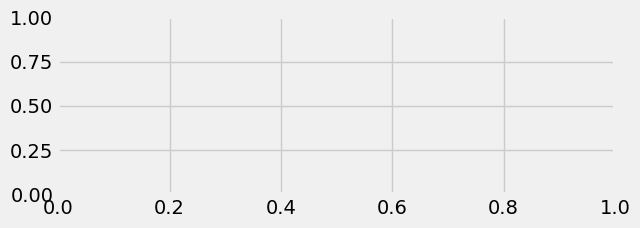

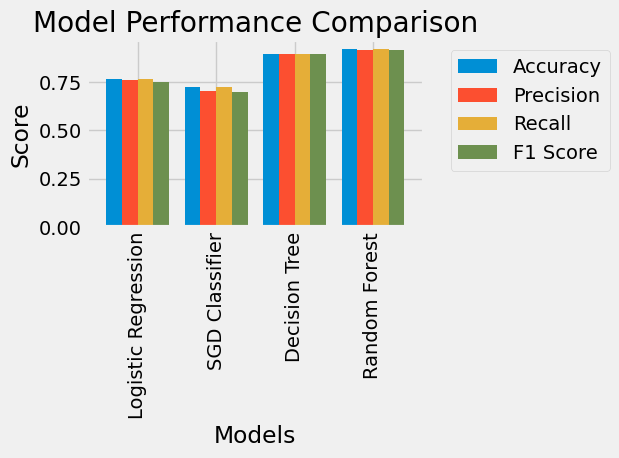

In [26]:
metrics_df = pd.DataFrame(metrics_dict)
print("\nAll Models Performance Metrics:")
print(metrics_df)
plt.style.use('fivethirtyeight')
plt.subplot(2, 1, 1)
performance_metrics = metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']]
performance_metrics.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



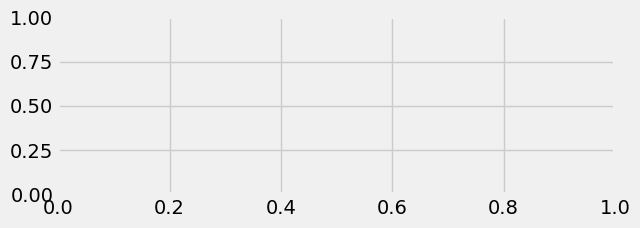

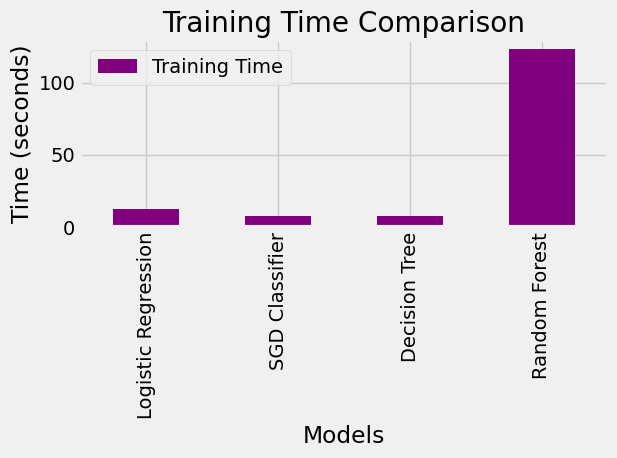

In [27]:
plt.subplot(2, 1, 2)
time_comparison = metrics_df[['Model', 'Training Time']].set_index('Model')
time_comparison.plot(kind='bar', color='purple')
plt.title('Training Time Comparison')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

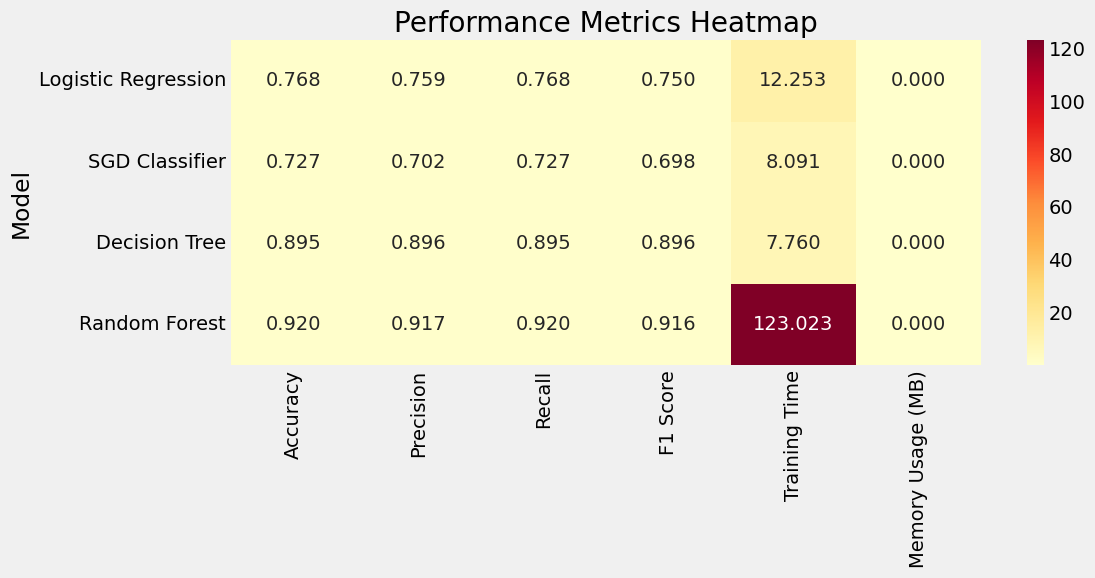

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Memory Usage (MB)']], 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.3f')
plt.title('Performance Metrics Heatmap')
plt.tight_layout()
plt.show()

In [29]:
label_encoder = joblib.load('label_encoder.pkl')
target_names = label_encoder.classes_
print("\nBest Model Performance:")
print(f"Model: {metrics_df.iloc[metrics_df['Accuracy'].argmax()]['Model']}")
print(classification_report(y_test, best_model.predict(X_test), 
                          target_names=target_names))
metrics_df.to_csv('model_comparison_results.csv', index=False)
print("\nDetailed results saved to 'model_comparison_results.csv'")


Best Model Performance:
Model: Random Forest
              precision    recall  f1-score   support

        calm       0.97      1.00      0.98     10647
     dancing       0.74      0.78      0.76      5046
   energetic       1.00      0.97      0.99     24564
       happy       0.81      0.92      0.87     35996
     neutral       0.96      0.98      0.97     63059
    relaxing       1.00      0.96      0.98     30120
         sad       0.70      0.45      0.55     13911

    accuracy                           0.92    183343
   macro avg       0.88      0.87      0.87    183343
weighted avg       0.92      0.92      0.92    183343


Detailed results saved to 'model_comparison_results.csv'


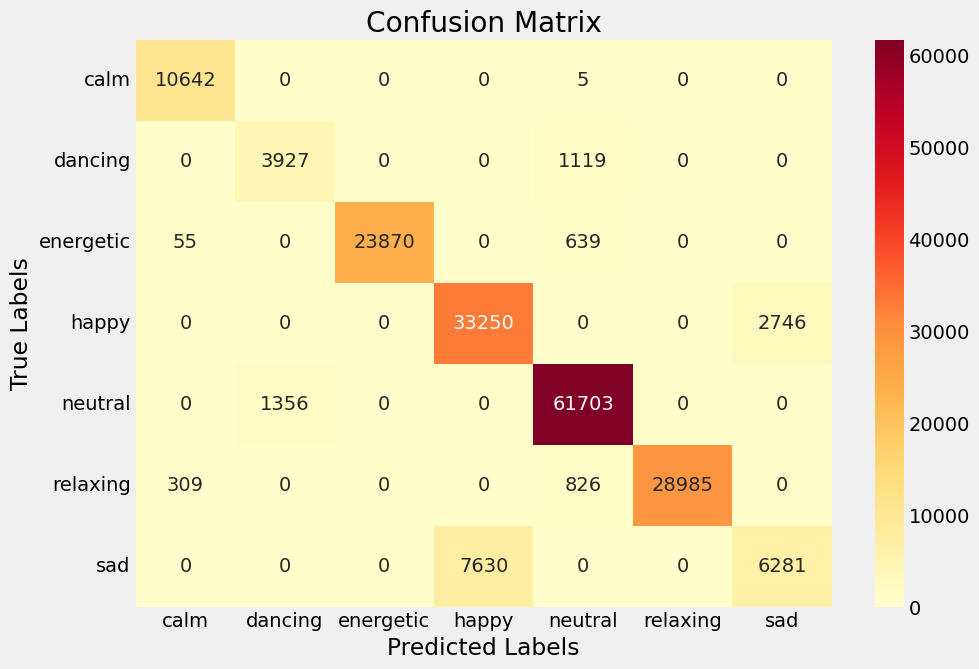

In [30]:
label_encoder = joblib.load('label_encoder.pkl')
y_test_encoded = label_encoder.transform(y_test) if isinstance(y_test[0], str) else y_test
y_pred_encoded = label_encoder.transform(y_pred) if isinstance(y_pred[0], str) else y_pred
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_names = label_encoder.classes_
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=class_names,  # Use original class names
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Compute class weights for balancing
class_weights = 'balanced'

# Define the pipeline
balanced_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=200, 
        max_depth=20, 
        min_samples_split=10, 
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1
    ))
])

balanced_rf_pipeline.fit(X_train, y_train)
y_pred_balanced = balanced_rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.63      0.94      0.75      5046
           2       1.00      0.97      0.99     24564
           3       0.84      0.86      0.85     35996
           4       0.97      0.96      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.61      0.57      0.59     13911

    accuracy                           0.91    183343
   macro avg       0.86      0.89      0.87    183343
weighted avg       0.92      0.91      0.91    183343



In [32]:

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=10, class_weight='balanced')

# Define AdaBoost
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=200,
        learning_rate=0.5,
        random_state=42
    ))
])

# Train the model
ada_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_ada = ada_pipeline.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_ada))


c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.66      0.81      0.72      5046
           2       1.00      0.97      0.99     24564
           3       0.82      0.66      0.73     35996
           4       0.96      0.97      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.41      0.63      0.50     13911

    accuracy                           0.88    183343
   macro avg       0.83      0.86      0.84    183343
weighted avg       0.90      0.88      0.88    183343



In [ ]:
start_time = time.time()
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters optimized for speed and performance
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    
    # Speed-focused parameters
    'boosting_type': 'gbdt',
    'num_leaves': 31,  # Smaller than default
    'max_depth': 6,
    'learning_rate': 0.1,
    
    # Memory and speed optimization
    'feature_fraction': 0.8,  # Use 80% of features in each iteration
    'bagging_fraction': 0.8,  # Use 80% of data in each iteration
    'bagging_freq': 5,
    
    # Additional performance optimizations
    'min_data_in_leaf': 50,  # Avoid overfitting
    'min_sum_hessian_in_leaf': 1e-3,
    
    # CPU optimization
    'num_threads': 4,  # Adjust based on your CPU
    
    # Handle imbalanced dataset
    'is_unbalance': True,
    
    # Verbose output
    'verbose': -1
}

print("Training LightGBM model...")

# Define callbacks for early stopping and logging
callbacks = [
    lgb.early_stopping(stopping_rounds=10),
    lgb.log_evaluation(period=10)
]

# Train model with callbacks
model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=100,
    valid_sets=[valid_data],
    callbacks=callbacks
)
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_labels)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

Training LightGBM model...
Training until validation scores don't improve for 10 rounds
[10]	valid_0's multi_logloss: 0.472697
[20]	valid_0's multi_logloss: 0.284449
[30]	valid_0's multi_logloss: 0.241091
[40]	valid_0's multi_logloss: 0.231463
[50]	valid_0's multi_logloss: 0.236153
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.231463

Training completed in 25.05 seconds

Making predictions...

Classification Report:
              precision    recall  f1-score   support

        calm       0.96      1.00      0.98     10647
     dancing       0.74      0.76      0.75      5046
   energetic       1.00      0.97      0.99     24564
       happy       0.80      0.93      0.86     35996
     neutral       0.96      0.98      0.97     63059
    relaxing       1.00      0.96      0.98     30120
         sad       0.69      0.42      0.52     13911

    accuracy                           0.92    183343
   macro avg       0.88      0.86      0.86    183343
weighted avg     

In [34]:
# Calculate class weights
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weight_dict = dict(zip(range(len(class_counts)), class_weights))

# Modified parameters with class weights and adjusted settings
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    
    # Speed-focused parameters
    'boosting_type': 'gbdt',
    'num_leaves': 63,  # Increased for more complexity
    'max_depth': 8,    # Increased to capture more patterns
    'learning_rate': 0.05,  # Reduced for better generalization
    
    # Memory and speed optimization
    'feature_fraction': 0.9,  # Increased slightly
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    
    # Additional performance optimizations
    'min_data_in_leaf': 30,  # Reduced to allow more granular splits
    'min_sum_hessian_in_leaf': 1e-3,
    
    # CPU optimization
    'num_threads': 4,
    
    # Remove is_unbalance and use weights instead
    'is_unbalance': False,
    
    # Verbose output
    'verbose': -1
}

# Create dataset with weights
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    weight=np.array([class_weight_dict[label] for label in y_train])
)
valid_data = lgb.Dataset(
    X_test, 
    label=y_test, 
    reference=train_data
)

# Define callbacks
callbacks = [
    lgb.early_stopping(stopping_rounds=20),  # Increased patience
    lgb.log_evaluation(period=10)
]

# Train with more rounds
model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=200,  # Increased maximum rounds
    valid_sets=[valid_data],
    callbacks=callbacks
)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.7962
[20]	valid_0's multi_logloss: 0.478583
[30]	valid_0's multi_logloss: 0.356785
[40]	valid_0's multi_logloss: 0.308661
[50]	valid_0's multi_logloss: 0.290623
[60]	valid_0's multi_logloss: 0.285376
[70]	valid_0's multi_logloss: 0.286581
[80]	valid_0's multi_logloss: 0.290998
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.28532


In [35]:
y_pred_probs = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.argmax(y_pred_probs, axis=1)
report = classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98     10647
     Class 1       0.57      0.98      0.72      5046
     Class 2       1.00      0.97      0.99     24564
     Class 3       0.86      0.77      0.81     35996
     Class 4       0.97      0.94      0.96     63059
     Class 5       1.00      0.96      0.98     30120
     Class 6       0.53      0.67      0.59     13911

    accuracy                           0.90    183343
   macro avg       0.84      0.90      0.86    183343
weighted avg       0.91      0.90      0.90    183343



In [36]:
start_time = time.time()
# Calculate class weights with smoothing
class_counts = np.bincount(y_train)
total_samples = len(y_train)
# Apply square root to smooth the weights
class_weights = np.sqrt(total_samples / (len(class_counts) * class_counts))
class_weight_dict = dict(zip(range(len(class_counts)), class_weights))
# Create weighted dataset
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    weight=np.array([class_weight_dict[label] for label in y_train])
)
valid_data = lgb.Dataset(
    X_test, 
    label=y_test, 
    reference=train_data
)

# Hybrid parameters combining best aspects of both versions
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    
    # Core parameters
    'boosting_type': 'gbdt',
    'num_leaves': 31,  # Keep original value
    'max_depth': 6,    # Keep original value
    'learning_rate': 0.1,  # Keep original faster learning rate
    
    # Balanced optimization settings
    'feature_fraction': 0.85,
    'bagging_fraction': 0.85,
    'bagging_freq': 5,
    
    # Refined leaf parameters
    'min_data_in_leaf': 40,
    'min_sum_hessian_in_leaf': 1e-3,
    
    # Additional tweaks
    'num_threads': 4,
    'verbose': -1,
    
    # Focus on hard examples
    'scale_pos_weight': 1.0,  # Let class weights handle imbalance
    'lambda_l1': 0.1,        # Light L1 regularization
    'lambda_l2': 0.1,        # Light L2 regularization
}

print("Training LightGBM model...")

callbacks = [
    lgb.early_stopping(stopping_rounds=15),  # Middle ground for early stopping
    lgb.log_evaluation(period=10)
]

model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=150,  # Increased but not too much
    valid_sets=[valid_data],
    callbacks=callbacks
)

# Calculate training time
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_labels)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

Training LightGBM model...
Training until validation scores don't improve for 15 rounds
[10]	valid_0's multi_logloss: 0.502444
[20]	valid_0's multi_logloss: 0.300673
[30]	valid_0's multi_logloss: 0.25343
[40]	valid_0's multi_logloss: 0.242107
[50]	valid_0's multi_logloss: 0.246259
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.242107

Training completed in 24.78 seconds

Making predictions...

Classification Report:
              precision    recall  f1-score   support

        calm       0.95      1.00      0.98     10647
     dancing       0.62      0.95      0.75      5046
   energetic       1.00      0.97      0.99     24564
       happy       0.83      0.86      0.85     35996
     neutral       0.97      0.95      0.96     63059
    relaxing       1.00      0.96      0.98     30120
         sad       0.61      0.55      0.58     13911

    accuracy                           0.91    183343
   macro avg       0.85      0.89      0.87    183343
weighted avg      

In [ ]:
start_time = time.time()

# Calculate class weights with cubic root smoothing for less aggressive reweighting
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = np.power(total_samples / (len(class_counts) * class_counts), 1/3)
class_weight_dict = dict(zip(range(len(class_counts)), class_weights))

# Create weighted dataset
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    weight=np.array([class_weight_dict[label] for label in y_train])
)
valid_data = lgb.Dataset(
    X_test, 
    label=y_test, 
    reference=train_data
)

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    
    # Core parameters
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth': 6,
    'learning_rate': 0.08,  # Slightly reduced
    
    # Balanced optimization settings
    'feature_fraction': 0.85,
    'bagging_fraction': 0.85,
    'bagging_freq': 5,
    
    # Refined leaf parameters
    'min_data_in_leaf': 45,  # Slightly increased
    'min_sum_hessian_in_leaf': 1e-3,
    
    # Additional tweaks
    'num_threads': 4,
    'verbose': -1,
    
    # Balanced regularization
    'lambda_l1': 0.15,  # Increased slightly
    'lambda_l2': 0.15,  # Increased slightly
    
    # Additional parameters for better precision
    'max_bin': 255,
    'min_gain_to_split': 0.1
}

print("Training LightGBM model...")

callbacks = [
    lgb.early_stopping(stopping_rounds=15),
    lgb.log_evaluation(period=10)
]

model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=150,
    valid_sets=[valid_data],
    callbacks=callbacks
)


training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")


print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_labels)
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))



Training LightGBM model...
Training until validation scores don't improve for 15 rounds
[10]	valid_0's multi_logloss: 0.58738
[20]	valid_0's multi_logloss: 0.341271
[30]	valid_0's multi_logloss: 0.264571
[40]	valid_0's multi_logloss: 0.240103
[50]	valid_0's multi_logloss: 0.235924
[60]	valid_0's multi_logloss: 0.239008
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.235391

Training completed in 24.02 seconds

Making predictions...

Classification Report:
              precision    recall  f1-score   support

        calm       0.95      1.00      0.98     10647
     dancing       0.65      0.92      0.76      5046
   energetic       1.00      0.97      0.99     24564
       happy       0.82      0.89      0.85     35996
     neutral       0.97      0.96      0.96     63059
    relaxing       1.00      0.96      0.98     30120
         sad       0.63      0.50      0.56     13911

    accuracy                           0.91    183343
   macro avg       0.86      0.89

In [38]:
start_time = time.time()

print("Original dataset shape:", Counter(y_train))

# Apply SMOTE to balance the dataset
# Using sampling_strategy='auto' will make all classes have the same frequency as the majority class
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled dataset shape:", Counter(y_train_resampled))

# Create LightGBM datasets with resampled data
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters optimized for balanced dataset
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    
    # Core parameters
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth': 6,
    'learning_rate': 0.08,
    
    # Balanced optimization settings
    'feature_fraction': 0.85,
    'bagging_fraction': 0.85,
    'bagging_freq': 5,
    
    # Leaf parameters
    'min_data_in_leaf': 45,
    'min_sum_hessian_in_leaf': 1e-3,
    
    # Remove class weights since data is now balanced
    'lambda_l1': 0.15,
    'lambda_l2': 0.15,
    
    # Additional parameters
    'num_threads': 4,
    'verbose': -1,
    'max_bin': 255,
    'min_gain_to_split': 0.1
}

print("\nTraining LightGBM model...")

callbacks = [
    lgb.early_stopping(stopping_rounds=15),
    lgb.log_evaluation(period=10)
]

model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=150,
    valid_sets=[valid_data],
    callbacks=callbacks
)

# Calculate training time
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_labels)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))



Original dataset shape: Counter({4: 252234, 3: 143983, 5: 120480, 2: 98255, 6: 55644, 0: 42588, 1: 20186})


c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Counter({3: 252234, 6: 252234, 2: 252234, 4: 252234, 0: 252234, 5: 252234, 1: 252234})

Training LightGBM model...
Training until validation scores don't improve for 15 rounds
[10]	valid_0's multi_logloss: 0.669645
[20]	valid_0's multi_logloss: 0.400549
[30]	valid_0's multi_logloss: 0.315826
[40]	valid_0's multi_logloss: 0.286662
[50]	valid_0's multi_logloss: 0.280345
[60]	valid_0's multi_logloss: 0.282166
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.279696

Training completed in 76.52 seconds

Making predictions...

Classification Report:
              precision    recall  f1-score   support

        calm       0.95      1.00      0.98     10647
     dancing       0.56      0.97      0.71      5046
   energetic       1.00      0.96      0.98     24564
       happy       0.86      0.76      0.81     35996
     neutral       0.97      0.94      0.96     63059
    relaxing       1.00      0.96      0.98     30120
         sad       0.52     

In [40]:
cols = ["acousticness", "valence", "loudness","energy","tempo"]
X_train = X_train[cols]
X_test=X_test[cols]

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, 
                                class_weight='balanced',
                                random_state=42,
                                n_jobs=-1)),
    ('xgb', XGBClassifier(n_estimators=200,
                         learning_rate=0.1,
                         max_depth=7,
                         scale_pos_weight=1,
                         random_state=42,
                         n_jobs=-1)),
    ('lgb', LGBMClassifier(n_estimators=200,
                          learning_rate=0.1,
                          max_depth=7,
                          class_weight='balanced',
                          random_state=42,
                          n_jobs=-1))
]

# Initialize meta classifier
meta_classifier = LogisticRegression(multi_class='multinomial',
                                   max_iter=1000,
                                   class_weight='balanced',
                                   random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Generate out-of-fold predictions for meta-features
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Convert to numpy arrays if they're DataFrames
X_train_values = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_values = y_train.values if isinstance(y_train, pd.Series) else y_train

# Create array to store out-of-fold predictions
oof_predictions = np.zeros((X_train_values.shape[0], len(base_models), len(np.unique(y_train_values))))

# For each model
for i, (name, model) in enumerate(base_models):
    # For each fold
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_values, y_train_values)):
        # Train the model on the fold
        model_clone = clone(model)
        model_clone.fit(X_train_values[train_idx], y_train_values[train_idx])
        
        # Get predictions for validation fold
        fold_preds = model_clone.predict_proba(X_train_values[val_idx])
        oof_predictions[val_idx, i, :] = fold_preds

# Reshape meta-features for meta classifier
meta_features = oof_predictions.reshape(oof_predictions.shape[0], -1)

# Scale meta-features
meta_features_scaled = scaler.fit_transform(meta_features)

# Train meta classifier
meta_classifier.fit(meta_features_scaled, y_train_values)

# Train final base models on full dataset
trained_base_models = []
for name, model in base_models:
    model_clone = clone(model)
    model_clone.fit(X_train_values, y_train_values)
    trained_base_models.append(model_clone)

# Convert test data to numpy if it's a DataFrame
X_test_values = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

# Make predictions on test set
test_meta_features = np.zeros((X_test_values.shape[0], len(base_models), len(np.unique(y_train_values))))

for i, model in enumerate(trained_base_models):
    test_meta_features[:, i, :] = model.predict_proba(X_test_values)

# Reshape and scale test meta-features
test_meta_features_reshaped = test_meta_features.reshape(test_meta_features.shape[0], -1)
test_meta_features_scaled = scaler.transform(test_meta_features_reshaped)

# Make final predictions
y_pred = meta_classifier.predict(test_meta_features_scaled)

# Print results
print("Stacking Ensemble Performance:")
print(classification_report(y_test_values, y_pred))
# Optional: Compare with individual model performances
print("\nIndividual Model Performances:")
for name, model in zip(['Random Forest', 'XGBoost', 'LightGBM'], trained_base_models):
    y_pred_individual = model.predict(X_test_values)
    print(f"\n{name}:")
    print(classification_report(y_test_values, y_pred_individual))

c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight"

Stacking Ensemble Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.61      0.96      0.74      5046
           2       1.00      0.97      0.99     24564
           3       0.87      0.78      0.82     35996
           4       0.97      0.95      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.55      0.69      0.61     13911

    accuracy                           0.90    183343
   macro avg       0.85      0.90      0.87    183343
weighted avg       0.92      0.90      0.91    183343


Individual Model Performances:

Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.76      0.75      0.75      5046
           2       1.00      0.97      0.99     24564
           3       0.81      0.93      0.87     35996
           4       0.96      0.98      0.97     63059

In [ ]:
# Calculate class weights
unique_classes, class_counts = np.unique(y_train_values, return_counts=True)
total_samples = len(y_train_values)
class_weights = {cls: total_samples / (len(unique_classes) * count) 
                for cls, count in zip(unique_classes, class_counts)}

# Initialize base models with modified parameters
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300,
                                max_depth=15,
                                class_weight=class_weights,
                                min_samples_leaf=2,
                                random_state=42,
                                n_jobs=-1)),
    ('xgb', XGBClassifier(n_estimators=300,
                         learning_rate=0.05,
                         max_depth=8,
                         min_child_weight=3,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42,
                         n_jobs=-1)),
    ('lgb', LGBMClassifier(n_estimators=300,
                          learning_rate=0.05,
                          max_depth=8,
                          class_weight=class_weights,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          random_state=42,
                          n_jobs=-1))
]

# Use another LightGBM as meta classifier instead of LogisticRegression
meta_classifier = LGBMClassifier(n_estimators=200,
                               learning_rate=0.05,
                               max_depth=5,
                               class_weight=class_weights,
                               random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Generate out-of-fold predictions
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create array to store out-of-fold predictions
oof_predictions = np.zeros((X_train_values.shape[0], len(base_models), len(np.unique(y_train_values))))

# For each model
for i, (name, model) in enumerate(base_models):
    print(f"Training {name} for meta-features...")
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_values, y_train_values)):
        model_clone = clone(model)
        model_clone.fit(X_train_values[train_idx], y_train_values[train_idx])
        fold_preds = model_clone.predict_proba(X_train_values[val_idx])
        oof_predictions[val_idx, i, :] = fold_preds

# Add original features to meta-features
meta_features = np.column_stack([
    oof_predictions.reshape(oof_predictions.shape[0], -1),
    X_train_values
])

# Scale meta-features
meta_features_scaled = scaler.fit_transform(meta_features)

# Train meta classifier
print("Training meta classifier...")
meta_classifier.fit(meta_features_scaled, y_train_values)

# Train final base models
trained_base_models = []
for name, model in base_models:
    print(f"Training final {name} model...")
    model_clone = clone(model)
    model_clone.fit(X_train_values, y_train_values)
    trained_base_models.append(model_clone)

# Make predictions on test set
test_meta_features = np.zeros((X_test_values.shape[0], len(base_models), len(np.unique(y_train_values))))

for i, model in enumerate(trained_base_models):
    test_meta_features[:, i, :] = model.predict_proba(X_test_values)

# Add original test features to meta-features
test_meta_features = np.column_stack([
    test_meta_features.reshape(test_meta_features.shape[0], -1),
    X_test_values
])

# Scale test meta-features
test_meta_features_scaled = scaler.transform(test_meta_features)

# Make final predictions
y_pred = meta_classifier.predict(test_meta_features_scaled)

# Print results
print("\nStacking Ensemble Performance:")
print(classification_report(y_test_values, y_pred))

# Compare with individual models
print("\nIndividual Model Performances:")
for name, model in zip(['Random Forest', 'XGBoost', 'LightGBM'], trained_base_models):
    y_pred_individual = model.predict(X_test_values)
    print(f"\n{name}:")
    print(classification_report(y_test_values, y_pred_individual))

Training rf for meta-features...
Training xgb for meta-features...
Training lgb for meta-features...
Training meta classifier...
Training final rf model...
Training final xgb model...
Training final lgb model...

Stacking Ensemble Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.58      0.98      0.73      5046
           2       1.00      0.97      0.99     24564
           3       0.87      0.75      0.81     35996
           4       0.97      0.94      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.53      0.72      0.61     13911

    accuracy                           0.90    183343
   macro avg       0.85      0.90      0.86    183343
weighted avg       0.92      0.90      0.90    183343


Individual Model Performances:

Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
  

Training Random Forest...
Training XGBoost...
Training LightGBM...

Soft Voting Ensemble Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.62      0.95      0.75      5046
           2       1.00      0.97      0.99     24564
           3       0.84      0.86      0.85     35996
           4       0.97      0.95      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.61      0.58      0.60     13911

    accuracy                           0.91    183343
   macro avg       0.86      0.90      0.87    183343
weighted avg       0.92      0.91      0.91    183343


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.60      0.97      0.74      5046
           2       1.00      0.97      0.99     24564
           3       0.85      0.81      0.83     35996
  

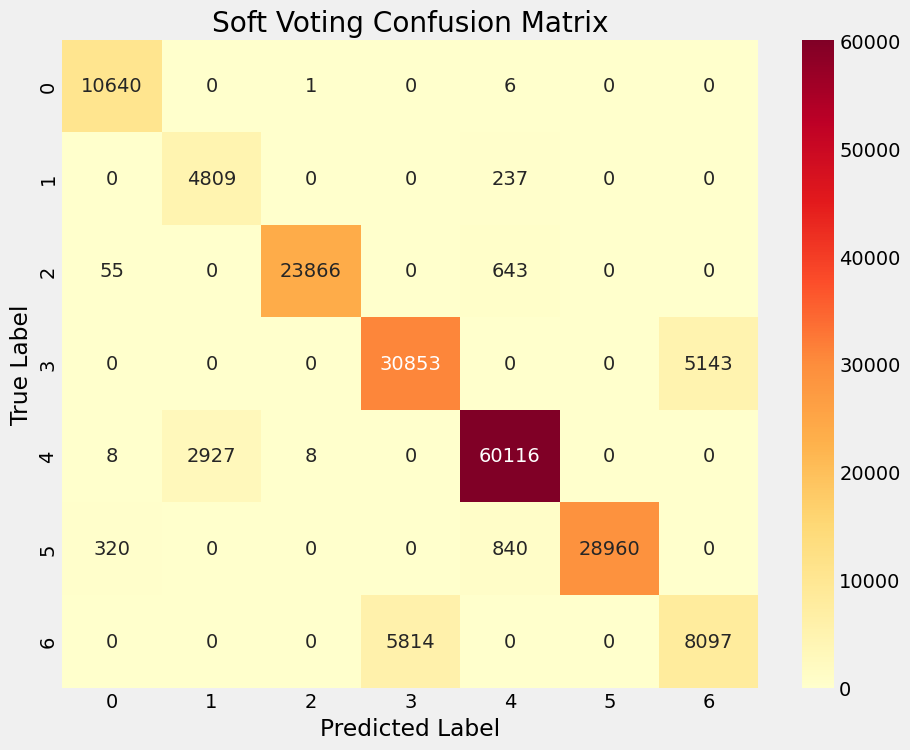


Per-class accuracy:
Class | Ensemble | RF | XGB | LGB
----------------------------------------
    0 | 0.999 | 1.000 | 0.990 | 0.998
    1 | 0.953 | 0.966 | 0.768 | 0.974
    2 | 0.972 | 0.972 | 0.970 | 0.971
    3 | 0.857 | 0.811 | 0.925 | 0.768
    4 | 0.953 | 0.949 | 0.977 | 0.943
    5 | 0.961 | 0.962 | 0.958 | 0.960
    6 | 0.582 | 0.625 | 0.439 | 0.696


In [ ]:
unique_classes, class_counts = np.unique(y_train_values, return_counts=True)
total_samples = len(y_train_values)
class_weights = {cls: total_samples / (len(unique_classes) * count) 
                for cls, count in zip(unique_classes, class_counts)}

# Initialize models with optimized parameters
rf = RandomForestClassifier(n_estimators=300,
                          max_depth=15,
                          class_weight=class_weights,
                          min_samples_leaf=2,
                          random_state=42,
                          n_jobs=-1)

xgb = XGBClassifier(n_estimators=300,
                    learning_rate=0.05,
                    max_depth=8,
                    min_child_weight=3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1)

lgb = LGBMClassifier(n_estimators=300,
                    learning_rate=0.05,
                    max_depth=8,
                    class_weight=class_weights,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1)

# Train all models
print("Training Random Forest...")
rf.fit(X_train_values, y_train_values)

print("Training XGBoost...")
xgb.fit(X_train_values, y_train_values)

print("Training LightGBM...")
lgb.fit(X_train_values, y_train_values)

# Get probability predictions from each model
rf_proba = rf.predict_proba(X_test_values)
xgb_proba = xgb.predict_proba(X_test_values)
lgb_proba = lgb.predict_proba(X_test_values)

# Define voting weights based on model performance
weights = [0.35, 0.35, 0.3]  # RF, XGB, LGB respectively

# Combine predictions using weighted average
weighted_proba = (
    weights[0] * rf_proba + 
    weights[1] * xgb_proba + 
    weights[2] * lgb_proba
)

# Get final predictions
y_pred = np.argmax(weighted_proba, axis=1)

# Get individual model predictions
y_pred_rf = rf.predict(X_test_values)
y_pred_xgb = xgb.predict(X_test_values)
y_pred_lgb = lgb.predict(X_test_values)

# Print results
print("\nSoft Voting Ensemble Performance:")
print(classification_report(y_test_values, y_pred))

print("\nRandom Forest Performance:")
print(classification_report(y_test_values, y_pred_rf))

print("\nXGBoost Performance:")
print(classification_report(y_test_values, y_pred_xgb))

print("\nLightGBM Performance:")
print(classification_report(y_test_values, y_pred_lgb))

# Create confusion matrix
cm = confusion_matrix(y_test_values, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Soft Voting Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print per-class accuracies
classes = np.unique(y_test_values)
print("\nPer-class accuracy:")
print("Class | Ensemble | RF | XGB | LGB")
print("-" * 40)
for c in classes:
    mask = y_test_values == c
    ens_acc = np.mean(y_pred[mask] == y_test_values[mask])
    rf_acc = np.mean(y_pred_rf[mask] == y_test_values[mask])
    xgb_acc = np.mean(y_pred_xgb[mask] == y_test_values[mask])
    lgb_acc = np.mean(y_pred_lgb[mask] == y_test_values[mask])
    print(f"{c:5d} | {ens_acc:.3f} | {rf_acc:.3f} | {xgb_acc:.3f} | {lgb_acc:.3f}")

Training Random Forest...
Training XGBoost...
Training LightGBM...

Soft Voting Ensemble Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.62      0.95      0.75      5046
           2       1.00      0.97      0.99     24564
           3       0.84      0.86      0.85     35996
           4       0.97      0.95      0.96     63059
           5       1.00      0.96      0.98     30120
           6       0.61      0.58      0.60     13911

    accuracy                           0.91    183343
   macro avg       0.86      0.90      0.87    183343
weighted avg       0.92      0.91      0.91    183343


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10647
           1       0.60      0.97      0.74      5046
           2       1.00      0.97      0.99     24564
           3       0.85      0.81      0.83     35996
  

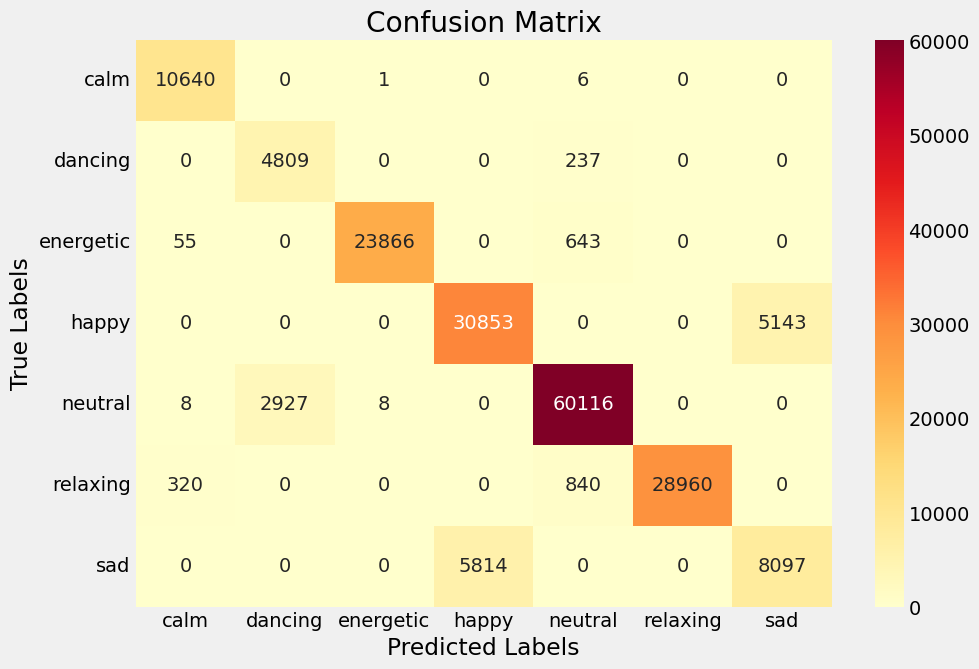


Per-class accuracy:
Class | Ensemble | RF | XGB | LGB
----------------------------------------
    0 | 0.999 | 1.000 | 0.990 | 0.998
    1 | 0.953 | 0.966 | 0.768 | 0.974
    2 | 0.972 | 0.972 | 0.970 | 0.971
    3 | 0.857 | 0.811 | 0.925 | 0.768
    4 | 0.953 | 0.949 | 0.977 | 0.943
    5 | 0.961 | 0.962 | 0.958 | 0.960
    6 | 0.582 | 0.625 | 0.439 | 0.696

Saving models and ensemble components...
Models and ensemble configuration saved successfully!


In [ ]:


# Create directory for saved models if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Calculate class weights
unique_classes, class_counts = np.unique(y_train_values, return_counts=True)
total_samples = len(y_train_values)
class_weights = {cls: total_samples / (len(unique_classes) * count) 
                for cls, count in zip(unique_classes, class_counts)}

# Initialize models with optimized parameters
rf = RandomForestClassifier(n_estimators=300,
                          max_depth=15,
                          class_weight=class_weights,
                          min_samples_leaf=2,
                          random_state=42,
                          n_jobs=-1)

xgb = XGBClassifier(n_estimators=300,
                    learning_rate=0.05,
                    max_depth=8,
                    min_child_weight=3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1)

lgb = LGBMClassifier(n_estimators=300,
                    learning_rate=0.05,
                    max_depth=8,
                    class_weight=class_weights,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1)

# Train all models
print("Training Random Forest...")
rf.fit(X_train_values, y_train_values)

print("Training XGBoost...")
xgb.fit(X_train_values, y_train_values)

print("Training LightGBM...")
lgb.fit(X_train_values, y_train_values)

# Get probability predictions from each model
rf_proba = rf.predict_proba(X_test_values)
xgb_proba = xgb.predict_proba(X_test_values)
lgb_proba = lgb.predict_proba(X_test_values)

# Define voting weights based on model performance
weights = [0.35, 0.35, 0.3]  # RF, XGB, LGB respectively

# Combine predictions using weighted average
weighted_proba = (
    weights[0] * rf_proba + 
    weights[1] * xgb_proba + 
    weights[2] * lgb_proba
)

# Get final predictions
y_pred = np.argmax(weighted_proba, axis=1)

# Get individual model predictions
y_pred_rf = rf.predict(X_test_values)
y_pred_xgb = xgb.predict(X_test_values)
y_pred_lgb = lgb.predict(X_test_values)

# Print results
print("\nSoft Voting Ensemble Performance:")
print(classification_report(y_test_values, y_pred))

print("\nRandom Forest Performance:")
print(classification_report(y_test_values, y_pred_rf))

print("\nXGBoost Performance:")
print(classification_report(y_test_values, y_pred_xgb))

print("\nLightGBM Performance:")
print(classification_report(y_test_values, y_pred_lgb))

# Plot confusion matrix with label encoder
label_encoder = joblib.load('label_encoder.pkl')
y_test_encoded = label_encoder.transform(y_test_values) if isinstance(y_test_values[0], str) else y_test_values
y_pred_encoded = label_encoder.transform(y_pred) if isinstance(y_pred[0], str) else y_pred
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_names = label_encoder.classes_
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate per-class accuracies
classes = np.unique(y_test_values)
print("\nPer-class accuracy:")
print("Class | Ensemble | RF | XGB | LGB")
print("-" * 40)
for c in classes:
    mask = y_test_values == c
    ens_acc = np.mean(y_pred[mask] == y_test_values[mask])
    rf_acc = np.mean(y_pred_rf[mask] == y_test_values[mask])
    xgb_acc = np.mean(y_pred_xgb[mask] == y_test_values[mask])
    lgb_acc = np.mean(y_pred_lgb[mask] == y_test_values[mask])
    print(f"{c:5d} | {ens_acc:.3f} | {rf_acc:.3f} | {xgb_acc:.3f} | {lgb_acc:.3f}")

# Save the models and ensemble components
print("\nSaving models and ensemble components...")
joblib.dump(rf, 'saved_models/random_forest.pkl')
joblib.dump(xgb, 'saved_models/xgboost.pkl')
joblib.dump(lgb, 'saved_models/lightgbm.pkl')
joblib.dump(weights, 'saved_models/ensemble_weights.pkl')

# Create a dictionary with the ensemble configuration
ensemble_config = {
    'weights': weights,
    'models': {
        'rf': rf,
        'xgb': xgb,
        'lgb': lgb
    }
}

# Save the entire ensemble configuration as a single file
joblib.dump(ensemble_config, 'saved_models/ensemble_full.pkl')

print("Models and ensemble configuration saved successfully!")

In [8]:
filepath2=r"C:\Users\DEBARSHI\Documents\Programs\Python\ML-with-Spotify\Stage 1\my_playlist.csv"
new_data=pd.read_csv(filepath2)
new_cols=["acousticness", "valence", "loudness","energy","tempo"]

In [9]:
new_data = new_data[new_cols]  # Ensure only the required columns are used
ensemble_config = joblib.load('saved_models/ensemble_full.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Extract models and weights
rf = ensemble_config['models']['rf']
xgb = ensemble_config['models']['xgb']
lgb = ensemble_config['models']['lgb']
weights = ensemble_config['weights']

# Predict probabilities
rf_proba = rf.predict_proba(new_data)
xgb_proba = xgb.predict_proba(new_data)
lgb_proba = lgb.predict_proba(new_data)

# Combine predictions using weighted average
weighted_proba = (
    weights[0] * rf_proba + 
    weights[1] * xgb_proba + 
    weights[2] * lgb_proba
)

# Get final predictions (class with highest probability)
final_predictions = np.argmax(weighted_proba, axis=1)

# Decode predictions to original class labels
decoded_predictions = label_encoder.inverse_transform(final_predictions)

# Add predictions to the original dataset
new_data['Predicted_Mood'] = decoded_predictions

# Show the predicted moods and the count of each mood
mood_counts = new_data['Predicted_Mood'].value_counts()

# Display predictions and mood counts
print("\nPredicted Moods for New Data:")
print(new_data[['Predicted_Mood']].head())

print("\nMood Counts:")
print(mood_counts)


c:\Users\DEBARSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Predicted Moods for New Data:
  Predicted_Mood
0            sad
1            sad
2            sad
3            sad
4            sad

Mood Counts:
Predicted_Mood
sad          31
energetic    19
Name: count, dtype: int64


In [ ]:
large_dataset_path = r"C:\Users\DEBARSHI\Documents\Programs\Python\ML-with-Spotify\tracks_features.csv"
large_data = pd.read_csv(large_dataset_path)
audio_features = ["acousticness", "valence", "loudness", "energy", "tempo"]
large_audio_features = large_data[audio_features]
new_audio_features = new_data[audio_features]
scaler = StandardScaler()
large_audio_features_scaled = scaler.fit_transform(large_audio_features)
new_audio_features_scaled = scaler.transform(new_audio_features)
similarity_matrix = cosine_similarity(new_audio_features_scaled, large_audio_features_scaled)
recommended_songs = []

# Loop through each song in the new data
for idx, similarities in enumerate(similarity_matrix):
    # Get indices of the top 1 most similar songs
    top_indices = np.argsort(similarities)[::-1][:1]  # Change 1 to your desired number of recommendations
    
    # Retrieve the top songs and their information
    top_songs = large_data.iloc[top_indices]
    recommended_songs.append(top_songs)

# Combine all recommendations into a single DataFrame
recommended_playlist = pd.concat(recommended_songs, ignore_index=True)

# Add the Predicted_Mood column for context
recommended_playlist['Predicted_Mood'] = np.repeat(new_data['Predicted_Mood'], 5).reset_index(drop=True)

# Display the recommended playlist
print("\nRecommended Playlist Based on Audio Features:")
print(recommended_playlist)
print("\nRecommended Playlist Mood Distribution:")
print(recommended_playlist['Predicted_Mood'].value_counts())



Recommended Playlist Based on Audio Features:
                        id                                               name  \
0   3DWgMTe4MOD9LHIHIluxxS                                Celebrate (New Day)   
1   7BKLCZ1jbUBVqRi2FVlTVw                                             Closer   
2   219aFog2qgkWrjDk1D6Y60                                          slide out   
3   6RUKPb4LETWmmr3iAEQktW                           Something Just Like This   
4   7DFb2c3q5cxKnjK5z3ASLH                                            Шамбала   
5   06Mviyu2rl6kQ5aTsxdMXZ                     Remember My Name (feat. Sevyn)   
6   0UFFEe69MX0X8PKZuYZ23U  Грустный дэнс (feat. Артём Качер) - Kolya Funk...   
7   4Aep3WGBQlpbKXkW7kfqcU                 See You Again (feat. Charlie Puth)   
8   0zbZXJiA6k9uaLJ4jhIzbg                               Rome's About to Fall   
9   4JO9ACki6rEjEZUnowCPpw                                 Callin All Bitches   
10  37FXw5QGFN7uwwsLy8uAc0         We Don't Talk Anymore (feat